# Лабораторная работа 4
## Выделение контуров на изображениях
__Вариант 3__

Выполнил: Клионкин Владислав 6132

In [1]:
from matplotlib.pylab import *
from matplotlib import pyplot as plt
import numpy as np
import cv2
from collections import defaultdict

1. Считать цветное rgb изображение. Преобразовать в градации серого.

In [90]:
%matplotlib inline

def plt_show_img(img, is_gray = True):
    figure(figsize=(10, 10))
    axis("off")
    imshow(img, cmap = plt.get_cmap('gray') if is_gray else None)
    
def img_to_grayscale(rgb_img):
    return (rgb_img[:,:,0]*0.2126 + rgb_img[:,:,1]*0.7152 + rgb_img[:,:,2]*0.0722).astype(np.uint8)

def threshold_prep(img_grayscale, threshold = 100):
    img_threshold = img_grayscale.copy()
    img_threshold[img_threshold < threshold] = 0
    img_threshold[img_threshold >= threshold] = 1
    return img_threshold

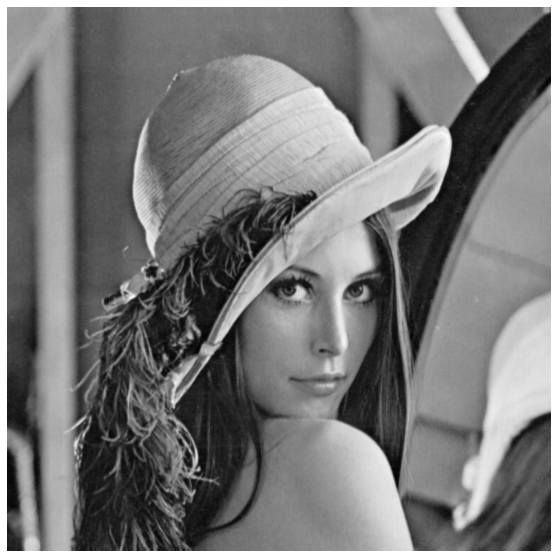

In [69]:
IMG_PATH = "./lena.jpg"

img = cv2.cvtColor(cv2.imread(IMG_PATH), cv2.COLOR_BGR2RGB)
img_gray = img_to_grayscale(img)
plt_show_img(img_gray, True)

2. Сделать выделение контуров методом простого градиента. Модуль градиента аппроксимируется максимумом среди модулей производных.

In [82]:
def convolution(_img, _kernel, _crop=None):
    flat_kernel = _kernel.flatten()
    win_x, win_y = _kernel.shape
    img_x, img_y = _img.shape
    pad_x, pad_y = win_x // 2, win_y // 2
    img_sliding_window = np.lib.stride_tricks.sliding_window_view(
        np.pad(_img, [(pad_x, pad_x),(pad_y, pad_y)], mode='constant', constant_values=((0,0),(0,0))), (win_x, win_y)
    )[0:img_x, 0:img_y].reshape((img_x*img_y,win_x*win_y))
    img_sliding_window = np.sum(img_sliding_window * flat_kernel, axis=1).reshape((img_x,img_y)).clip(0, 255)
    return img_sliding_window.astype(uint8)

#plt_show_img(convolution(img_gray, np.array([[-1, 1]])), True)
#np.pad(img_gray, [(0, 0),(1, 1)], mode='constant', constant_values=((0,0),(0,0))).shape

In [83]:
grad_x = convolution(img_gray, np.array([[-1, 1]]))
grad_y = convolution(img_gray, np.array([[-1], [1]]))

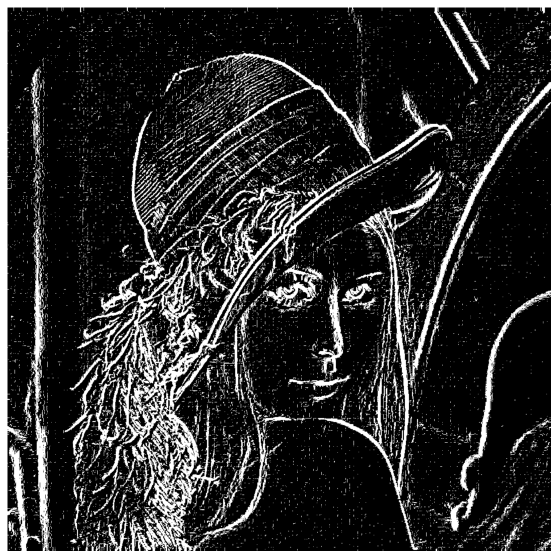

In [94]:
img_grad_contour = np.maximum(grad_x, grad_y)
img_grad_contour_binary = threshold_prep(img_grad_contour, 4)
plt_show_img(img_grad_contour_binary, True)

3. Сделать выделение контуров методом по вариантам (оператор Лапласа). 

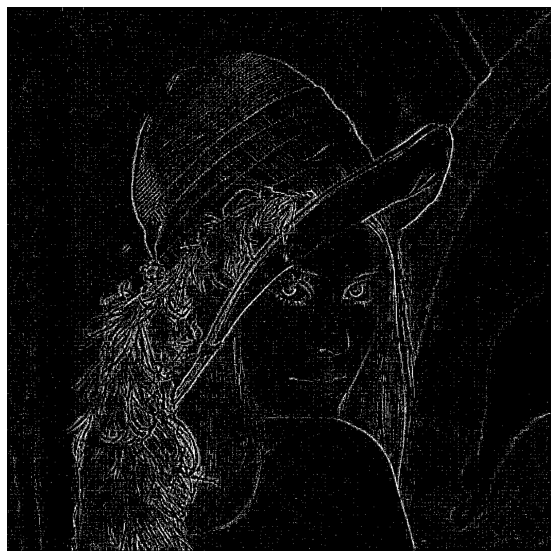

In [103]:
laplasian = np.array([
    [0, 1, 0],
    [1,-4, 1],
    [0, 1 ,0]
])

img_laplas = np.abs(convolution(img_gray, laplasian))
img_laplas_binary = threshold_prep(img_laplas, 8)
plt_show_img(img_laplas_binary, True)

4. Сделать выделение контуров методом с согласованием (Аппроксимация поверхностью 1-го порядка, окно 3x3). 

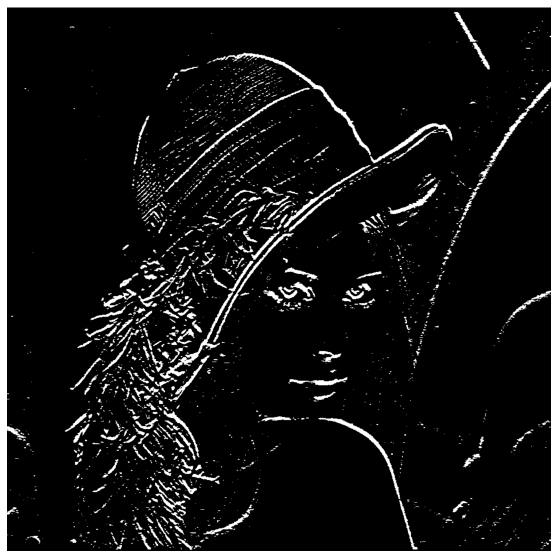

In [106]:
mask = (1/6) * np.array([
    [-1,-1,-1],
    [ 0, 0, 0],
    [ 1, 1, 1]
])

img_approx = convolution(img_gray, mask)
img_approx_binary = threshold_prep(img_approx, 4)
plt_show_img(img_approx_binary, True)